In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('uaScoresDataFrame.csv')
df

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,...,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,...,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,...,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,...,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


In [4]:
#check for any incompletes or duplicates
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [5]:
# one hot encoding: categorizing the country and continent into numerical values
# ADD CITY NAME IF YOU WAnt, IDK IF YOU WANT TO USE IT
# You can also drop if not using.
df2 = pd.get_dummies(data=df, columns=['UA_Country','UA_Continent'])
df2.head()
#df2=df

,Unnamed: 0,UA_Name,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,...,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Country_Andorra,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
0,0,Aarhus,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,...,0,0,0,0,0,0,1,0,0,0
1,1,Adelaide,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,...,0,0,0,0,0,0,0,0,1,0
2,2,Albuquerque,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,...,0,0,0,0,0,0,0,1,0,0
3,3,Almaty,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,...,0,0,0,0,0,1,0,0,0,0
4,4,Amsterdam,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,...,0,0,0,0,0,0,1,0,0,0


In [6]:
df.dtypes

Unnamed: 0                 int64
UA_Name                   object
UA_Country                object
UA_Continent              object
Housing                  float64
Cost of Living           float64
Startups                 float64
Venture Capital          float64
Travel Connectivity      float64
Commute                  float64
Business Freedom         float64
Safety                   float64
Healthcare               float64
Education                float64
Environmental Quality    float64
Economy                  float64
Taxation                 float64
Internet Access          float64
Leisure & Culture        float64
Tolerance                float64
Outdoors                 float64
dtype: object

In [7]:
cols_to_scale = ['Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity','Commute', 'Business Freedom', 'Safety','Healthcare','Education','Environmental Quality','Economy','Taxation','Internet Access','Leisure & Culture', 'Tolerance','Outdoors']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
                 

In [8]:
df2

,Unnamed: 0,UA_Name,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,...,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Country_Andorra,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
0,0,Aarhus,0.61315,0.4015,0.28270,0.2512,0.319579,0.938062,0.994000,0.955698,...,0,0,0,0,0,0,1,0,0,0
1,1,Adelaide,0.63095,0.4692,0.31365,0.2640,0.134368,0.793082,0.939967,0.760411,...,0,0,0,0,0,0,0,0,1,0
2,2,Albuquerque,0.72620,0.6059,0.37720,0.1493,0.100579,0.751393,0.867100,0.000000,...,0,0,0,0,0,0,0,1,0,0
3,3,Almaty,0.92820,0.9333,0.24585,0.0000,0.430737,0.872594,0.556800,0.689135,...,0,0,0,0,0,1,0,0,0,0
4,4,Amsterdam,0.30530,0.3824,0.79715,0.6107,0.823632,0.909341,0.883667,0.827124,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,0.75525,0.5882,0.37965,0.0000,0.102684,0.758639,0.896600,0.539710,...,0,0,0,0,0,0,0,1,0,0
262,262,Wroclaw,0.84520,0.8434,0.35860,0.2386,0.183632,0.736383,0.570433,0.788078,...,0,0,0,0,0,0,1,0,0,0
263,263,Yerevan,0.96945,0.9431,0.39265,0.0000,0.135474,0.839600,0.650100,0.869809,...,0,0,0,0,0,1,0,0,0,0
264,264,Zagreb,0.89100,0.7194,0.44530,0.1775,0.160842,0.717842,0.572033,0.844914,...,0,0,0,0,0,0,1,0,0,0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

We plot the correlation matrix for the different columns, we can get an idea of which columns are correlated from this figure

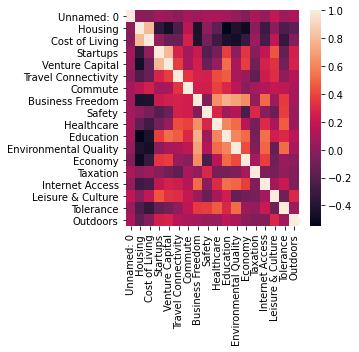

In [10]:
df3 = df2[df2.columns[:19]]

fig, ax = plt.subplots(figsize=(5,5))  

hm = sns.heatmap(df3.corr());
fig = hm.get_figure()
ax.figure.tight_layout()
fig.savefig('heatmap.jpg')

We then remove duplicate values and columns that are correlated with themselves and save it in a file

In [11]:
c = df3.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")
filtered_list = so[so>=0][::-2]
non_ones = filtered_list[filtered_list!=1.000]
non_ones.to_csv("correlation_list_reverse.csv")

df4=df3.drop(columns=["UA_Name"])


We create 4 categories using the correlations we have derived

In [12]:
import pandas as pd
import scipy.cluster.hierarchy as spc


df5 = df4.drop(columns=["Unnamed: 0"])
corr = df5.corr().values
print(df5.columns)
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
dict = {}
for i in range(len(idx)):
    if dict.get(idx[i]):
        dict[idx[i]].append(df5.columns[i])
    else:
        dict[idx[i]]= [df5.columns[i]]
dict

Index(['Housing', 'Cost of Living', 'Startups', 'Venture Capital',
       'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety',
       'Healthcare', 'Education', 'Environmental Quality', 'Economy',
       'Taxation', 'Internet Access', 'Leisure & Culture', 'Tolerance',
       'Outdoors'],
      dtype='object')


{1: ['Housing', 'Cost of Living'],
 4: ['Startups',
  'Venture Capital',
  'Travel Connectivity',
  'Commute',
  'Leisure & Culture',
  'Outdoors'],
 3: ['Business Freedom',
  'Healthcare',
  'Education',
  'Environmental Quality',
  'Economy',
  'Internet Access',
  'Tolerance'],
 2: ['Safety', 'Taxation']}

We create a representatuve value for each category from its columns

In [15]:
df4['category1']= df4['Housing']*df4['Cost of Living']
df4['category2']= df4['Travel Connectivity']*df4['Commute']*df4['Startups']*df4['Venture Capital']*df4['Leisure & Culture']*df4['Outdoors']
df4['category3']= df4['Business Freedom']*df4['Healthcare']*df4['Education']*df4['Environmental Quality']*df4['Economy']*df4['Internet Access']*df4['Tolerance']
df4['category4']= df4['Safety']*df4['Taxation']

In [16]:
df4['Vacation Lovers']= df4['Startups']*df4['Venture Capital']*df4['Business Freedom']*df4['Taxation']*df4['Economy']
df4['Entrepreneur & Business person']= df4['Travel Connectivity']*df4['Commute']*df4['Leisure & Culture']*df4['Internet Access']
df4['Stability Seeker']= df4['Housing']*df4['Cost of Living']*df4['Tolerance']*df4['Outdoors']
df4['Family']= df4['Safety']*df4['Healthcare']*df4['Education']*df4['Environmental Quality']

We then normalized this combined categorical data

In [17]:
df6 = df4[['category1','category2','category3','category4']]
df7 = df4[['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']]
cols_to_scale =['category1','category2','category3','category4']
scaler = MinMaxScaler()
df6[cols_to_scale] = scaler.fit_transform(df6[cols_to_scale])
scaler = MinMaxScaler()
cols_to_scale =['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']
df7[cols_to_scale] = scaler.fit_transform(df7[cols_to_scale])


<ipython-input-17-614722420f23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6[cols_to_scale] = scaler.fit_transform(df6[cols_to_scale])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [18]:
df7

,Vacation Lovers,Entrepreneur & Business person,Stability Seeker,Family
0,0.028931,0.103923,0.182111,0.656049
1,0.035464,0.022736,0.233708,0.504018
2,0.022465,0.023967,0.182452,0.000000
3,0.000000,0.030715,0.543812,0.045265
4,0.177814,0.345436,0.095555,0.590787
...,...,...,...,...
261,0.000000,0.021025,0.213622,0.231677
262,0.019616,0.045115,0.156158,0.195357
263,0.000000,0.023052,0.966565,0.000000
264,0.013914,0.034315,0.442353,0.276525


In [19]:
df6

,category1,category2,category3,category4
0,0.246180,0.007213,0.761387,0.463056
1,0.296042,0.005627,0.301294,0.329761
2,0.440005,0.001838,0.193978,0.000000
3,0.866289,0.000000,0.006935,0.586373
4,0.116747,0.455483,0.290757,0.390846
...,...,...,...,...
261,0.444238,0.000000,0.171281,0.387815
262,0.712842,0.005769,0.029773,0.384265
263,0.914288,0.000000,0.000000,0.697020
264,0.640985,0.005752,0.041108,0.671559


=======Assigninng weight part=======

as we can see from df6 and df7 above,, the value for each category is unbalanced, we have to set a new weight to each column

In [20]:
# First we check out how the value is defined in each column
data_con=df
data_con

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,...,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,...,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,...,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,...,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


plots for category1-4 on continents

In [21]:
#category_list from correlation heatmap
category_list=[['Housing', 'Cost of Living'],
            ['Travel Connectivity','Commute','Startups','Venture Capital','Leisure & Culture','Outdoors'],
             ['Business Freedom','Healthcare','Education','Environmental Quality','Economy','Internet Access','Tolerance'],
            ['Safety', 'Taxation']
            ]

#manual_cat from manually selected categories
manual_cat=[['Startups','Venture Capital','Business Freedom','Taxation','Economy'],
           ['Travel Connectivity','Commute','Leisure & Culture','Internet Access'],
           ['Housing','Cost of Living','Tolerance','Outdoors'],
           ['Safety','Healthcare','Education','Environmental Quality']]


color_list=['black','red','yellow','green','blue','purple','orange']

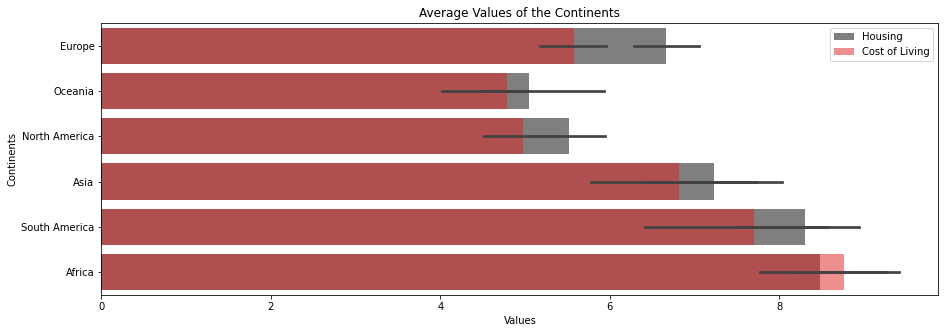

In [22]:
#plot bar on continents for category1-4
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[0])):
    sns.barplot(y='UA_Continent',x=category_list[0][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[0][i])


plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

In [ ]:
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[1])):
    sns.barplot(y='UA_Continent',x=category_list[1][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[1][i])

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

In [ ]:
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[2])):
    sns.barplot(y='UA_Continent',x=category_list[2][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[2][i])

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

In [ ]:
f,ax=plt.subplots(figsize=(15,5))
for i in range(len(category_list[3])):
    sns.barplot(y='UA_Continent',x=category_list[3][i],data=data_con,color=color_list[i],alpha=0.5,label=category_list[3][i])

plt.ylabel('Continents')
plt.xlabel('Values')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Average Values of the Continents')
ax.legend(loc='upper right',frameon = True)

plt.show()

Assign weight to 2 parallel cases: 

weight for manual_cat  (Vacation Lovers	Entrepreneur & Business person	Stability Seeker	Family),

cat_weight for category_list ( 'category1'-'category4')


### method
- get mean for each column
- normalize the mean value for each column in each category
- category=weight*column

In [23]:
# define weight for each column: using normalized mean vlaue for each column type
weight=[[],[],[],[]]
for i in range(4):
    for item in manual_cat[i]:
        weight[i].append(data_con[item].mean())


#normalize weight
for j in range(len(weight)):
    weight[j]=[weight[j][i]/sum(weight[j]) for i in range(len(weight[j]))]
    
#write weight to txt
with open('manual_weight.txt', 'w') as f:
    for w in weight:
        for item in w:
            f.write(str(item)+' ')
        f.write('\n')
    


In [24]:
# define weight for each column: using normalized mean vlaue for each column type
cat_weight=[[],[],[],[]]
for i in range(4):
    for item in category_list[i]:
        cat_weight[i].append(data_con[item].mean())


#normalize weight
for j in range(len(weight)):
    cat_weight[j]=[cat_weight[j][i]/sum(cat_weight[j]) for i in range(len(cat_weight[j]))]
    
#write weight to txt
with open('category_weight.txt', 'w') as f:
    for w in cat_weight:
        for item in w:
            f.write(str(item)+' ')
        f.write('\n')
    

In [25]:
df4['Vacation Lovers']= weight[0][0]*df4['Startups']+weight[0][1]*df4['Venture Capital']+weight[0][2]*df4['Business Freedom']+weight[0][3]*df4['Taxation']+weight[0][4]*df4['Economy']
df4['Entrepreneur & Business person']= weight[1][0]*df4['Travel Connectivity']+ weight[1][1]*df4['Commute']+ weight[1][2]*df4['Leisure & Culture']+ weight[1][3]*df4['Internet Access']
df4['Stability Seeker']=  weight[2][0]*df4['Housing']+weight[2][1]*df4['Cost of Living']+weight[2][2]*df4['Tolerance']+weight[2][3]*df4['Outdoors']
df4['Family']= weight[3][0]*df4['Safety']+weight[3][1]*df4['Healthcare']+weight[3][2]*df4['Education']+weight[3][3]*df4['Environmental Quality']

In [26]:
df4['category1']= cat_weight[0][0]*df4['Housing']+cat_weight[0][1]*df4['Cost of Living']
df4['category2']= cat_weight[1][0]*df4['Travel Connectivity']+cat_weight[1][1]*df4['Commute']+cat_weight[1][2]*df4['Startups']+cat_weight[1][3]*df4['Venture Capital']+cat_weight[1][4]*df4['Leisure & Culture']+cat_weight[1][5]*df4['Outdoors']
df4['category3']= cat_weight[2][0]*df4['Business Freedom']+cat_weight[2][1]*df4['Healthcare']+cat_weight[2][2]*df4['Education']+cat_weight[2][3]*df4['Environmental Quality']+cat_weight[2][4]*df4['Economy']+cat_weight[2][5]*df4['Internet Access']+cat_weight[2][6]*df4['Tolerance']
df4['category4']= cat_weight[3][0]*df4['Safety']+cat_weight[3][1]*df4['Taxation']

In [27]:
df6 = df4[['category1','category2','category3','category4']]
df7 = df4[['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']]
cols_to_scale =['category1','category2','category3','category4']
scaler = MinMaxScaler()
df6[cols_to_scale] = scaler.fit_transform(df6[cols_to_scale])
df6=df6*10
scaler = MinMaxScaler()
cols_to_scale =['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']
df7[cols_to_scale] = scaler.fit_transform(df7[cols_to_scale])
df7=df7*10


<ipython-input-27-0cfdad7525d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6[cols_to_scale] = scaler.fit_transform(df6[cols_to_scale])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [28]:
df6=df6.round(2)
df6

,category1,category2,category3,category4
0,5.14,4.69,10.00,7.13
1,5.55,4.87,8.49,5.50
2,6.70,4.28,7.53,0.00
3,9.31,4.65,3.94,7.07
4,3.42,8.94,8.29,6.16
...,...,...,...,...
261,6.77,4.27,7.37,5.36
262,8.44,4.59,4.91,5.96
263,9.57,5.57,4.27,8.10
264,8.10,4.90,6.11,7.89


In [29]:
df7=df7.round(2)
df7

,Vacation Lovers,Entrepreneur & Business person,Stability Seeker,Family
0,5.85,6.26,6.19,9.23
1,5.93,4.43,6.06,8.15
2,5.71,4.81,5.75,2.92
3,4.83,4.26,8.35,3.16
4,7.12,7.79,4.56,8.40
...,...,...,...,...
261,6.20,4.59,5.90,5.78
262,4.43,5.02,5.71,5.83
263,4.90,4.54,9.89,3.97
264,4.63,4.75,7.87,7.21
